<a href="https://colab.research.google.com/github/rohanjain1648/UDHBANI-HACKATHON/blob/main/Traffic_congestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np

from sklearn.metrics import mean_absolute_error, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
file_path = "/content/PS3-dataset.csv"
df = pd.read_csv(file_path)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])



In [7]:

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Area Name', 'Road/Intersection Name', 'Weather Conditions', 'Roadwork and Construction Activity']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le




In [8]:
# Feature selection
X = df.drop(columns=['Traffic Volume', 'Congestion Level', 'Incident Reports', 'Date'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Splitting for different tasks
X_train, X_test, y_train_vol, y_test_vol = train_test_split(X_scaled, df['Traffic Volume'], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_cong, y_test_cong = train_test_split(X_scaled, df['Congestion Level'], test_size=0.2, random_state=42)
X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(X_scaled, df['Incident Reports'], test_size=0.2, random_state=42)


In [13]:
### Model 1: Random Forest Regressor (Traffic Volume Prediction)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train_vol)
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest Regressor:")
print("R² Score:", r2_score(y_test_vol, y_pred_rf))
print("MAE:", mean_absolute_error(y_test_vol, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test_vol, y_pred_rf)))
print()



Random Forest Regressor:
R² Score: 0.9999946337991642
MAE: 7.227455257270691
RMSE: 30.00743626982639



In [15]:
### Model 2: LSTM for Time-Series Prediction
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mae')
model_lstm.fit(X_train_lstm, y_train_vol, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_vol))

y_pred_lstm = model_lstm.predict(X_test_lstm)
print("LSTM Regressor:")
print("R² Score:", r2_score(y_test_vol, y_pred_lstm))
print("MAE:", mean_absolute_error(y_test_vol, y_pred_lstm))
print("RMSE:", np.sqrt(mean_squared_error(y_test_vol, y_pred_lstm)))
print()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 29330.7578 - val_loss: 29447.7402
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 28947.5801 - val_loss: 29436.2969
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 29223.2773 - val_loss: 29425.0938
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 29320.9824 - val_loss: 29413.4609
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 29023.8789 - val_loss: 29402.0859
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 28800.5039 - val_loss: 29390.7812
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 29167.5957 - val_loss: 29379.5352
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 29139.9590 - val_loss: 29368.3027
Epoch 9/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 29051.6328 - val_loss: 29357.0879
Epoch 10/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 29167.4238 - val_loss: 29345.8711
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
LSTM Regressor:
R² S

In [20]:
### Model 3: Logistic Regression (Congestion Level Classification)
# Convert Congestion Level to categorical (if continuous)
y_train_cong = np.round(y_train_cong).astype(int)  # Round to nearest integer
y_test_cong = np.round(y_test_cong).astype(int)  # Round to nearest integer

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_clf, y_train_cong)
y_pred_log = log_reg.predict(X_test_clf)

# Print Evaluation Metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_cong, y_pred_log))
print("F1 Score:", f1_score(y_test_cong, y_pred_log, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_cong, y_pred_log))
print()

Logistic Regression:
Accuracy: 0.46308724832214765
F1 Score: 0.4216431856237005
Confusion Matrix:
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   7]
 [  0   0   0 ...   0   0  16]
 [  0   0   0 ...   0   0 797]]



In [21]:
### Model 4: Random Forest Classifier (Congestion Level)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_cong)
y_pred_rf_clf = rf_clf.predict(X_test_clf)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test_cong, y_pred_rf_clf))
print("F1 Score:", f1_score(y_test_cong, y_pred_rf_clf, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_cong, y_pred_rf_clf))
print()

Random Forest Classifier:
Accuracy: 0.46196868008948544
F1 Score: 0.4353804393093289
Confusion Matrix:
 [[  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   6]
 [  0   0   0 ...   0   0  13]
 [  0   0   0 ...   1   0 792]]



In [24]:
### Model 5: Gradient Boosting for Incident Prediction
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_inc, y_train_inc)
y_pred_gb = gb_clf.predict(X_test_inc)

print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test_inc, y_pred_gb))
print("F1 Score:", f1_score(y_test_inc, y_pred_gb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_inc, y_pred_gb))
print()

Gradient Boosting Classifier:
Accuracy: 0.32102908277404923
F1 Score: 0.2942424061833131
Confusion Matrix:
 [[274 112  86  11   2   3   1   2   0]
 [168 167 125  18   3   5   4   0   0]
 [ 48 196 130  20   2   1   2   0   0]
 [ 18 114  86   3   2   1   2   0   0]
 [  8  64  39   3   0   1   1   0   0]
 [  4  19  16   0   0   0   1   0   0]
 [  1   8   8   0   0   0   0   0   0]
 [  0   1   5   1   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0]]



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: -845.4697 - val_accuracy: 0.0000e+00 - val_loss: -13173.9922
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -30595.2012 - val_accuracy: 0.0000e+00 - val_loss: -128019.4062
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -190001.2969 - val_accuracy: 0.0000e+00 - val_loss: -461327.7188
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -584233.5625 - val_accuracy: 0.0000e+00 - val_loss: -1094981.1250
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -1330106.8750 - val_accuracy: 0.0000e+00 - val_loss: -2104423.0000
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -2350281.5000 - val_accuracy: 0.0000e+00 - val_loss: -3539087.7500
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: -3897961.2500 - val_accuracy: 0.0000e+00

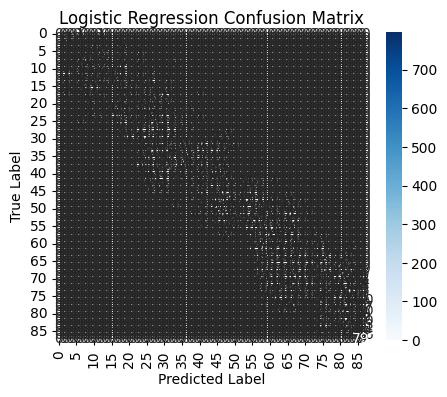

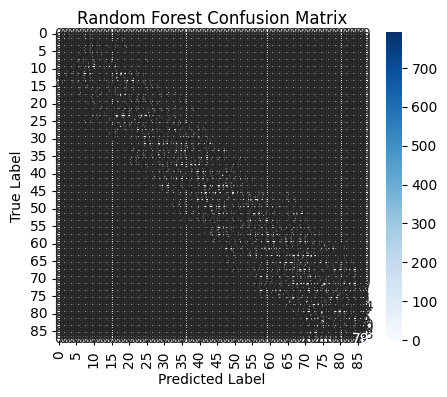

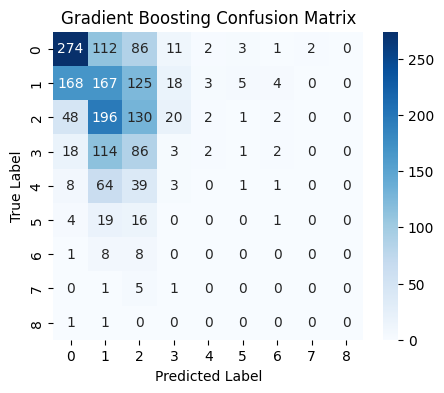

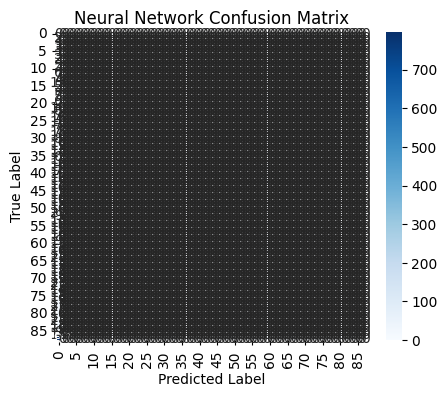

In [29]:
### Model 6: Neural Network for Congestion Level
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_clf.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train_clf, y_train_cong, epochs=10, batch_size=32, validation_data=(X_test_clf, y_test_cong))

y_pred_nn = (model_nn.predict(X_test_clf) > 0.5).astype("int32")

print("Neural Network Classifier:")
print("Accuracy:", accuracy_score(y_test_cong, y_pred_nn))
print("F1 Score:", f1_score(y_test_cong, y_pred_nn, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_cong, y_pred_nn))

# Plot confusion matrices for classification models
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test_cong, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test_cong, y_pred_rf_clf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test_inc, y_pred_gb, "Gradient Boosting Confusion Matrix")
plot_confusion_matrix(y_test_cong, y_pred_nn, "Neural Network Confusion Matrix")